# Team 44 Group Assignment: Stroke Prediction

A stroke can be defined as an interruption of blood flow to part of the brain, resulting in the death of brain cells due to lack of oxygen and nutrients. This will result in permanent loss of brain function within minutes if blood flow is not reestablished immediately such as a loss of motor functions and rational thought. According to the Centres for Disease Control and Prevention (CDC), 1 in 6 deaths from cardiovascular diseases was from strokes in the year 2020 in the United States.

There are two main types of stroke: ischemic stroke and hemorrhagic stroke.

Ischemic stroke: This is the most common type of stroke, accounting for about 80% of all cases. It occurs when a blood clot or atherosclerotic plaque blocks or narrows a blood vessel in the brain, reducing blood flow. Ischemic strokes can also be caused by other factors such as embolism (a blood clot that forms elsewhere in the body and travels to the brain) or systemic hypoperfusion (generalized inadequate blood flow).

Hemorrhagic stroke: This type of stroke happens when a blood vessel in the brain ruptures, leading to bleeding into the brain or the spaces surrounding it. Hemorrhagic strokes are less common but generally more severe than ischemic strokes. They can be further classified into intracerebral hemorrhage (bleeding within the brain tissue) and subarachnoid hemorrhage (bleeding into the space between the brain and the thin tissues that cover it).

Hence, it is imperative that steps be taken to identify individuals who are at risk of getting a stroke to prevent permanent physiological damage to individuals of society.

In this machine learning project, we, Team 44 of the WIA1006 Machine Learning course of University of Malaya would like to develop a machine learning model that predicts which individual(s) are at risk of getting a stroke. We will analyze a dataset of interest that will be used to train different machine learning models of which we will evaluate their respective accuracies and efficiencies.

## (A) Data Analysis

In [1]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics


### Loading dataset

This section involves previewing, studying the features and checking the dataset for missing values

In [2]:
# url = 'https://raw.githubusercontent.com/Chandrakant817/Stroke-Prediction/main/Stroke_Prediction/healthcare-dataset-stroke-data.csv'
# data = pd.read_csv(url)
data = pd.read_csv("stroke-dataset-ruthvik.csv")

In [3]:
# Print the first and last few rows of training example
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


There is a column 'id' which is irrelevant because the unique identifiers are not meaningful. That column will be discarded from the dataframe.

In [4]:
# Remove 'id' column
data.drop(columns="id", inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


From the data.info() command, we can see that the feature 'bmi' has missing values relative to all the other features. The missing values will need to be handled in the data preprocessing section later.

In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Based on the output above, there are some observations that can be made:
1. The average age of the individuals in the dataset is approximately 43 yeas, with a wide range from 0.08 to 82 years. The median age (50th percentile) is 45 years.
2. Around 9.7% of the individuals in the dataset have hypertension.
3. Around 5.4% of the individuals in the dataset have heart disease.
4. The mean glucose level is approximately 106.15.
5. The mean bmi is approximately 28.89. 
6. BMI contains missing values (BMI count is 4909 when data frame consists of 5110 rows).
7. Stroke column shows that the occurence of stroke is elatively rare, as the mean value is 0.0487, indicating that only a small percentage of individuals in the dataset have experienced a stroke.

<Axes: >

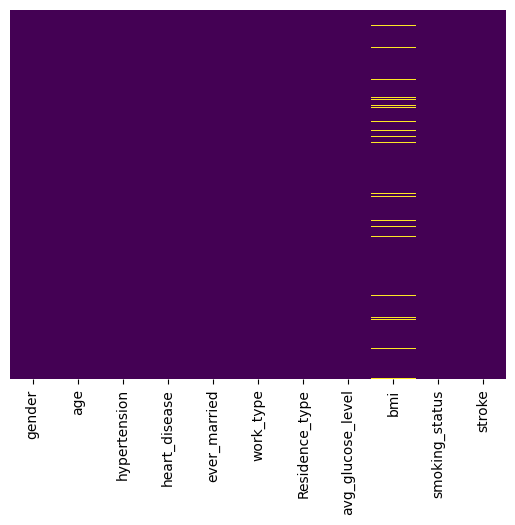

In [7]:
# Use seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
print(data.ever_married.value_counts())
print(data.work_type.value_counts())
print(data.Residence_type.value_counts())
print(data.smoking_status.value_counts())

ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


We can see that there are some non-numeric features or categorical variables available in the dataset. These will be processed to become numeric, binary features later on in the data preprocessing section

### Data visualization

Creating graphical representations of the numeric features to perceive the dataset from a different angle

Visualising data through graphical representation can provide a comprehensive understanding of the interplay between individual features and the target variable. This approach facilitates a more effective assessment of the relationship between the variables in question, allowing for a deeper and more nuanced analysis.


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

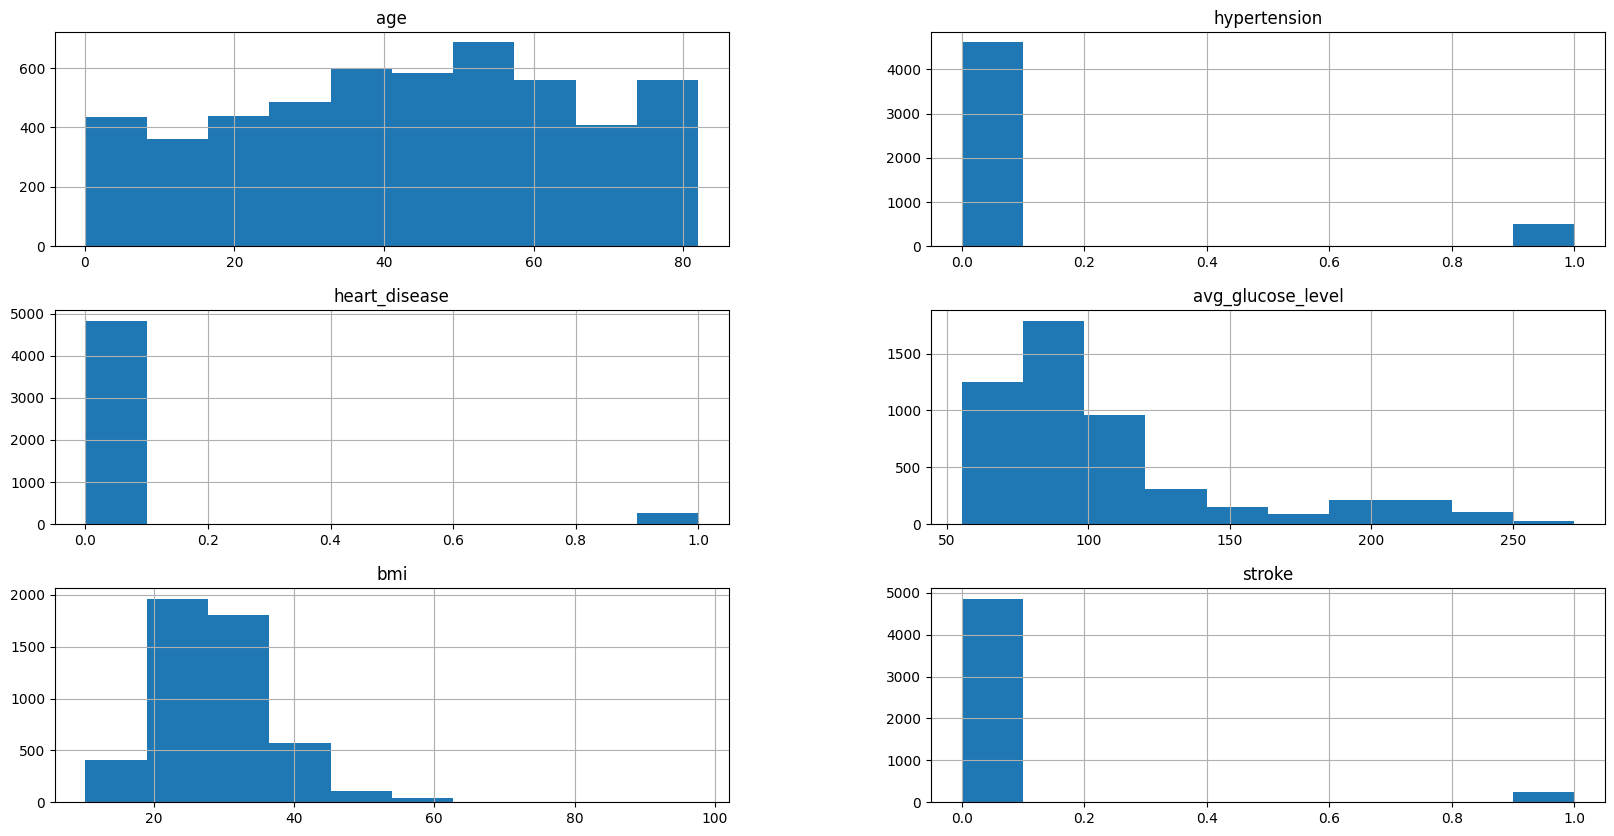

In [9]:
data.hist(figsize=(20,10))

UNIVARIATE ANALYSIS

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

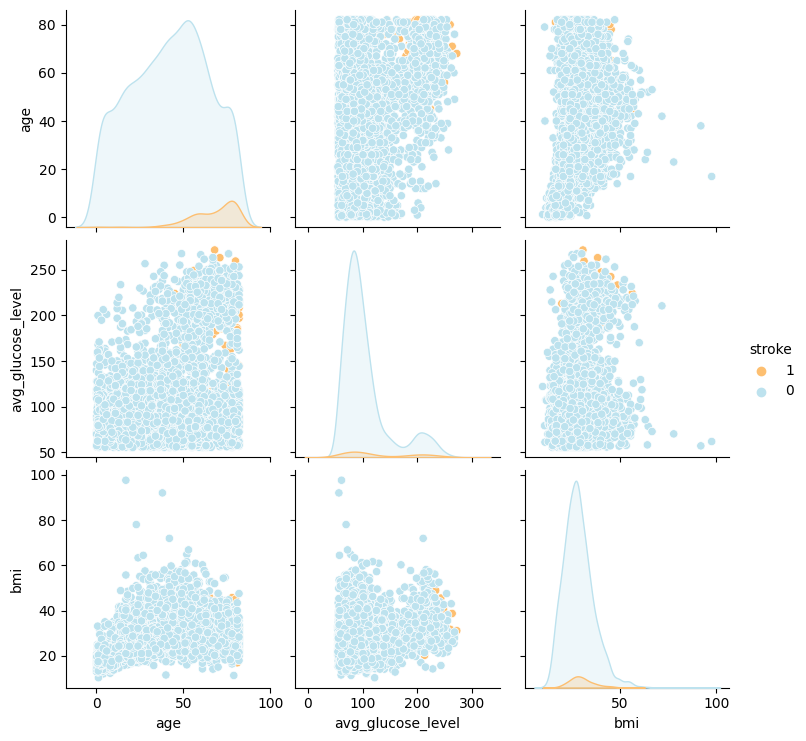

In [10]:
# We will observe the scatterplots of numerical variables, as well as the respective distribution of each one, highlighting the stroke values ​​for each visualization
sns.pairplot(data.drop(['hypertension', 'heart_disease'], axis=1), hue='stroke', palette='RdYlBu', hue_order=[1,0]);

MULTIVARIATE ANALYSIS

Multivariate analysis involves evaluating multiple variables (more than two) to identify any possible association among them. It offers a more complete examination of data by looking at all possible independent variables and their relationships to one another

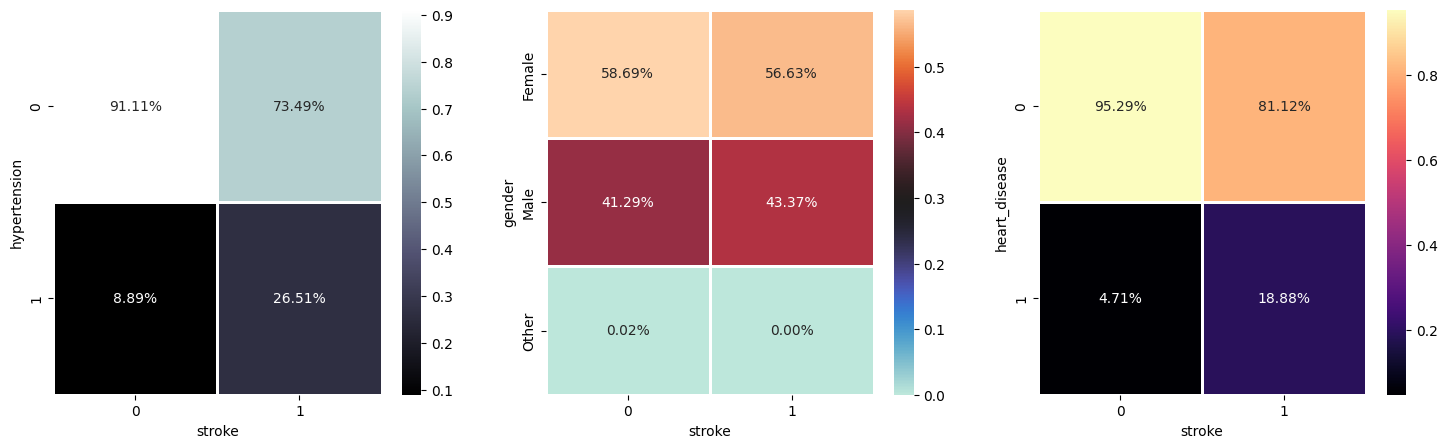

In [11]:
# Check the possibilities of getting stroke based on these variables: hypertension, gender, heart_disease 
# Using heatmap to find the correleation between the above variables and stroke
fig, ax = plt.subplots(1, 3, figsize=(18,5))

var = ['hypertension', 'gender', 'heart_disease'] # variables to compare
cmaps = ['bone', 'icefire', 'magma'] # attributes of map

for var, i in zip(var, range(3)):
    ctab = pd.crosstab(data[var], 
                   data['stroke'], 
                   normalize='columns')

    sns.heatmap(ctab, 
                annot=True, 
                fmt='.2%', 
                ax=ax[i],
                cmap=cmaps[i], 
                linewidths=1);

We can conclude that individuals without hypertension are the majority of people who have had a stroke. Women account for the largest number of stroke cases. People who do not have heart problems are the majority of those who have a stroke.

In [12]:
# Determining percentage of people who have stroke for each categorical data
def plot_percent_of_stroke(data, column, axis):
    x_axis = []
    y_axis = []

    unique_values = data[column].unique()

    for value in unique_values:
        stroke_yes = len(data[(data[column] == value) & (data['stroke'] == 1)])
        total = len(data[data[column] == value])
        percentage = (stroke_yes/total)*100
        x_axis.append(value)
        y_axis.append(percentage)

    palette = sns.color_palette("Reds", 5)
    sns.barplot(x=x_axis, y=y_axis, ax=axis, palette=palette) # create bar plot of the percentages for each catergory

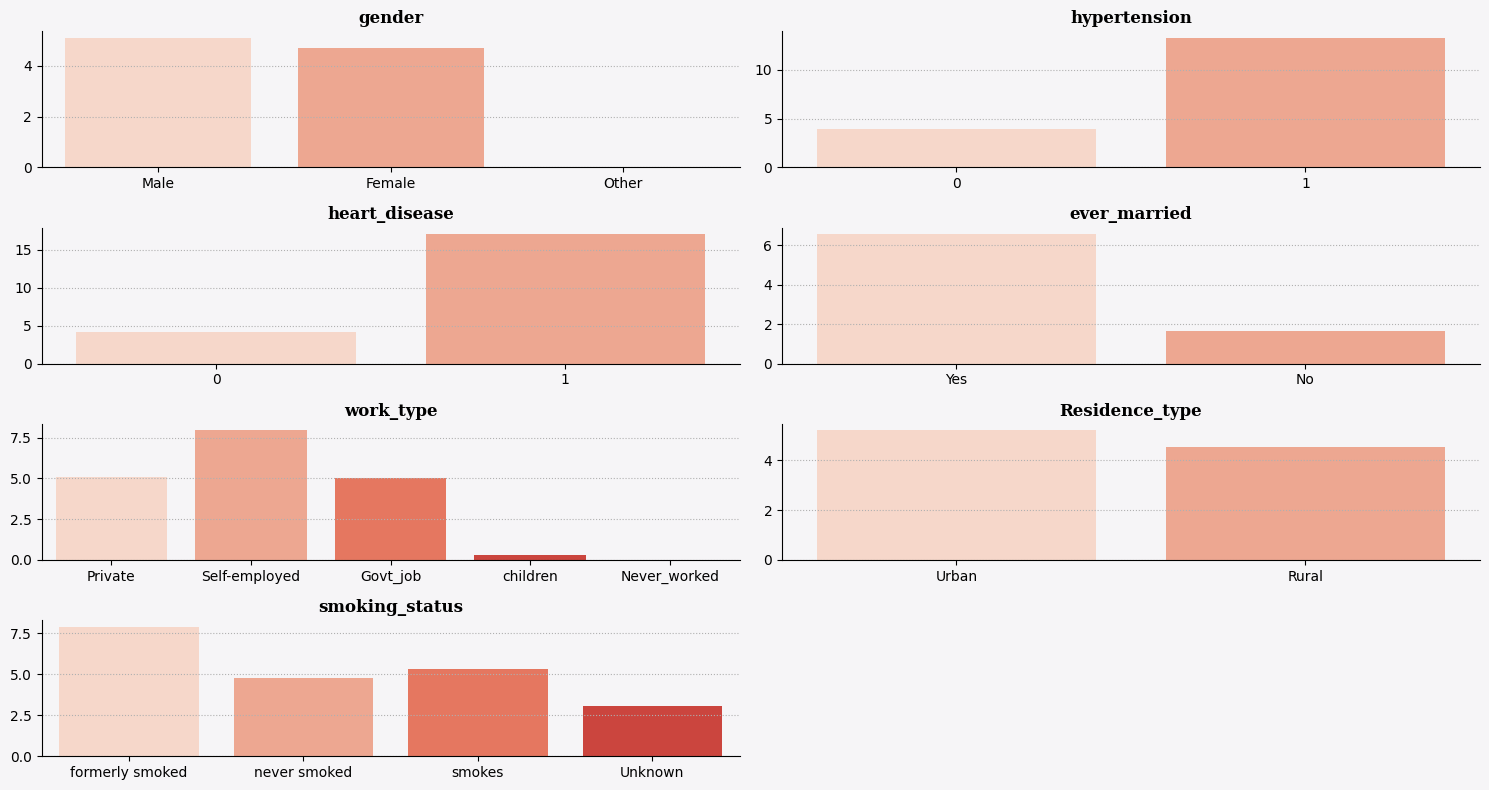

In [13]:
data_categorical = data[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]
fig = plt.figure(figsize=(15,8))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx, val in enumerate(data_categorical.columns):
    ax = plt.subplot(4, 2, indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val, fontweight='bold', fontfamily='serif')
    for i in ['top', 'right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':', axis='y')
    plot_percent_of_stroke(data, val, ax) # call function to plot percentage

plt.tight_layout()
plt.show()

Observations:
1. The percentage of male and female who has stroke are almost equal.

## (B) Data Preprocessing

### Handling missing values

There are various techniques to handle missing data:
1. Delete the record with missing values
    - this step is okay if you have a very huge dataset 
    - it is not suitable for small dataset
    - if the dataset is small, deleting records with missing values will cause disadvantageous impact to the performance of the model
2. Create a separate model to handle missing values
    - takes more time and computational efforts
    - consider the records with missing values as test dataset and the records without missing values as training dataset
    - eg. f1 has missing values, use f2, f3, f4 to feed to that separate training model and let f1 be the output feature
    - then use the f2, f3, f4 of the record with missing value to feed as input to the model, it will give output for f1(the missing value)
    - suitable for when you have smaller dataset, with lesser missing values
3. Using statistical methods like mean, median or mode
    - mean --> use the simple mean to replace the missing values
    - median --> sort in ascending order then use the central element to replace the missing values
    - mode --> use the value with most frequency to replace the missing values

For this model, we have chosen to use the statistical method using mean for the missing values of bmi.

In [14]:
def draw_missing_data_table(data) :
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [15]:
# Imputing the missing values with the mean
data = data.fillna(np.mean(data['bmi']))

In [16]:
# Display the status of updated dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have successfully filled in the missing values of bmi

### Handling non-numerical values

In [17]:
# Using one hot encoding to convert all categorical data 
# Integer encoded variable is removed and a new binary variable is added
categorical = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for i in categorical:
    data = pd.concat([data, pd.get_dummies(data[i], prefix=i)], axis=1)
    data.drop(i, axis=1, inplace=True)

In [18]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,202.21,28.893237,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.000000,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
5106,81.0,0,0,125.20,40.000000,0,True,False,False,False,...,False,False,True,False,False,True,False,False,True,False
5107,35.0,0,0,82.99,30.600000,0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


### Analysis with stroke

In [19]:
pd.DataFrame(data['stroke'].value_counts())

,count
stroke,
0,4861
1,249


We observe that the dataset in question is unbalanced, since we have 4,861 instances without stroke but 249 examples with stroke, so we can conclude that it will make much easier for a Machine Learning model to predict instances 0 than 1.

### Feature Selection

<Axes: >

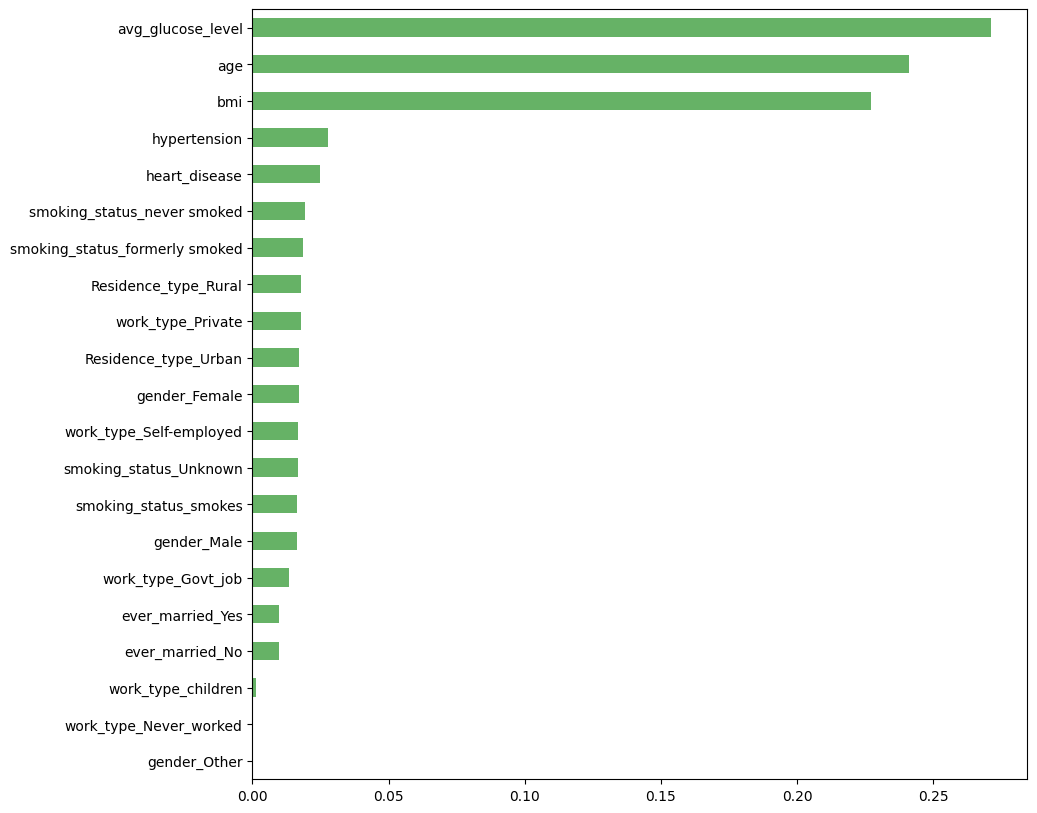

In [20]:
# Using random forest classifier to identify features 
from sklearn.ensemble import RandomForestClassifier

rffs = RandomForestClassifier()

rffs.fit(data.drop('stroke', axis=1), data['stroke'])

# Retrieve the feature importances calculated by rffs
rf_importances = rffs.feature_importances_
rf_importances = pd.Series(rf_importances, index=data.drop('stroke', axis=1).columns.values)

# Plot the figure in ascending order
plt.figure(figsize=(10,10))
rf_importances.sort_values().plot(kind='barh', color='g', alpha=.6)


We can conclude that the variables avg_gulcose_level, age, and bmi affect the prediction of getting stroke the highest.

In [21]:
# Check for null values
data.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [22]:
# Define variables
# Features
X = data.drop(['stroke'], axis=1).values

# Target
y = data['stroke'].values

### Handling Imbalance in the Dataset

Most of the time the minority class is our focus class (in this case it is the instances with stroke)

3 ways ot handle imbalance: 
1. Undersampling
    - sample size is smaller than the size of the actual dataset
    - not very popular bcs we're losing a lot of data (data is precious)

2. Oversampling
    - sample size more than size of actual dataset
    - i.e. keep 4861 as it is, and oversample the 249 to higher number
    - random duplication

3. SMOTE
    - take average of nearest neighbour of existing stroke=1 datapoints and extrapolate to create synthetic records
    - keep on taking until number of records become equal to majority class
    - the new samples are not duplicate, but synthetically created 


## (C) Machine Learning Model Training and Evaluation

We will identify which training model can give us the most accuracy in the f1 score. The models include: Logistic Regression, Random Forest, KNN (K-Nearest Neighbours), Neural Network, and Decision Tree.

We can see that data is balanced now 

We can now continue to check which machine learning algorithm works best with our balanced dataset

All models will use the random_state of 42 (following the same number as we used in splitting our dataset) and the max_depth of 5

### Logistic Regression

In [23]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

In [24]:
# Calculate class distribution before SMOTE
unique_classes, class_counts = np.unique(y, return_counts=True)
class_distribution_before_smote = dict(zip(unique_classes, class_counts))
print("Before SMOTE:", class_distribution_before_smote)

# Calculate class distribution after SMOTE
unique_classes_smote, class_counts_smote = np.unique(y_smote, return_counts=True)
class_distribution_after_smote = dict(zip(unique_classes_smote, class_counts_smote))
print("After SMOTE:", class_distribution_after_smote)

Before SMOTE: {0: 4861, 1: 249}
After SMOTE: {0: 4861, 1: 4861}


In [25]:
# Data split for logistic regression
from sklearn.model_selection import train_test_split

X_train_lr,X_test_lr, y_train_lr,y_test_lr = train_test_split(X_smote, y_smote, test_size=0.30, random_state=42)
'''X_valid_lr, X_test_lr, y_valid_lr, y_test_lr = train_test_split(X_test_lr, y_test_lr, test_size=0.5, random_state=42)'''

'X_valid_lr, X_test_lr, y_valid_lr, y_test_lr = train_test_split(X_test_lr, y_test_lr, test_size=0.5, random_state=42)'

In [26]:
# Standardise data values
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_lr = std.fit_transform(X_train_lr)
X_test_lr = std.transform(X_test_lr)

In [27]:
X_train_lr

array([[ 0.989335  , -0.51245351,  3.09609349, ..., -0.60293094,
        -0.8124733 , -0.4775369 ],
       [ 0.47528723,  1.95191311, -0.41794472, ...,  2.03776808,
        -0.8124733 , -0.4775369 ],
       [ 0.30938645, -0.51245351, -0.41794472, ..., -0.60293094,
         1.42615704, -0.4775369 ],
       ...,
       [ 0.21872664, -0.51245351,  0.46879503, ..., -0.60293094,
         0.86125638,  0.27026457],
       [-0.41589201, -0.51245351, -0.41794472, ..., -0.60293094,
        -0.8124733 ,  2.48590638],
       [ 0.33688512,  0.44168777,  1.96693868, ...,  0.24559655,
        -0.8124733 ,  1.5336725 ]])

In [28]:
X_test_lr

array([[-2.18375824, -0.51245351, -0.41794472, ..., -0.60293094,
        -0.8124733 , -0.4775369 ],
       [ 0.08824046,  2.27666872, -0.41794472, ...,  1.87746366,
        -0.8124733 , -0.4775369 ],
       [ 0.49070606, -0.51245351, -0.41794472, ..., -0.60293094,
         1.42615704, -0.4775369 ],
       ...,
       [-1.14117046, -0.51245351, -0.41794472, ..., -0.60293094,
         1.42615704, -0.4775369 ],
       [ 0.71735558, -0.51245351, -0.41794472, ..., -0.60293094,
         1.42615704, -0.4775369 ],
       [ 0.13834292, -0.51245351, -0.41794472, ..., -0.60293094,
        -0.8124733 , -0.4775369 ]])

In [29]:
# Train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [30]:
'''# Validate the model
y_pred_val = lr.predict(X_valid_lr)
validation_accuracy = lr.score(X_valid_lr, y_valid_lr)
print('Validation Accuracy:', validation_accuracy)'''

"# Validate the model\ny_pred_val = lr.predict(X_valid_lr)\nvalidation_accuracy = lr.score(X_valid_lr, y_valid_lr)\nprint('Validation Accuracy:', validation_accuracy)"

In [31]:
'''from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_val = accuracy_score(y_valid_lr, y_pred_val)
precision_val = precision_score(y_valid_lr, y_pred_val)
recall_val = recall_score(y_valid_lr, y_pred_val)
f1score_val = f1_score(y_valid_lr, y_pred_val)

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1-score:", f1score_val)'''

'from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\naccuracy_val = accuracy_score(y_valid_lr, y_pred_val)\nprecision_val = precision_score(y_valid_lr, y_pred_val)\nrecall_val = recall_score(y_valid_lr, y_pred_val)\nf1score_val = f1_score(y_valid_lr, y_pred_val)\n\nprint("Validation Accuracy:", accuracy_val)\nprint("Validation Precision:", precision_val)\nprint("Validation Recall:", recall_val)\nprint("Validation F1-score:", f1score_val)'

In [32]:
# Hyperparameter tuning

In [33]:
# Test the model
y_pred_lr = lr.predict(X_test_lr)
print(y_pred_lr)
print(y_test_lr)

[0 1 1 ... 0 1 0]
[0 1 0 ... 0 0 1]


In [34]:
# Logistic regression model evaluation

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test_lr, y_pred_lr)

# Calculate accuracy, precision, recall, and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test_lr, y_pred_lr)
precision = precision_score(y_test_lr, y_pred_lr)
recall = recall_score(y_test_lr, y_pred_lr)
f1score = f1_score(y_test_lr, y_pred_lr)

# Print the evaluation metrics
print("Confusion Matrix:")
print(confusion_mat)
print("Testing Accuracy:", accuracy)
print("Testing Precision:", precision)
print("Testing Recall:", recall)
print("Testing F1-score:", f1score)

Confusion Matrix:
[[1086  371]
 [ 274 1186]]
Testing Accuracy: 0.7788824134384642
Testing Precision: 0.7617212588310854
Testing Recall: 0.8123287671232877
Testing F1-score: 0.7862114683460392


1. Testing Accuracy: It is the proportion of correctly predicted samples (both true positives and true negatives) out of the total number of samples in the test dataset. In this case, the model achieved an accuracy of 0.7907, which means it correctly predicted approximately 79.07% of the samples in the test dataset.

2. Testing Precision: It is the proportion of true positives (correctly predicted positive samples) out of the total number of samples predicted as positive (both true positives and false positives). A higher precision indicates a lower rate of false positives. In this case, the model achieved a precision of 0.7648, indicating that approximately 76.48% of the samples predicted as positive were actually positive.

3. Testing Recall: It is the proportion of true positives out of the total number of actual positive samples (both true positives and false negatives). Recall is also known as sensitivity or true positive rate. A higher recall indicates a lower rate of false negatives. In this case, the model achieved a recall of 0.8392, indicating that approximately 83.92% of the actual positive samples were correctly identified.

4. Testing F1-score: It is the harmonic mean of precision and recall. The F1-score provides a balance between precision and recall, with higher values indicating better overall performance. In this case, the model achieved an F1-score of 0.8002, reflecting a balanced performance in terms of precision and recall.

These values are commonly used to evaluate the performance of classification models, such as logistic regression, on binary classification tasks.

In [35]:
from sklearn.metrics import classification_report

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_lr, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1457
           1       0.76      0.81      0.79      1460

    accuracy                           0.78      2917
   macro avg       0.78      0.78      0.78      2917
weighted avg       0.78      0.78      0.78      2917



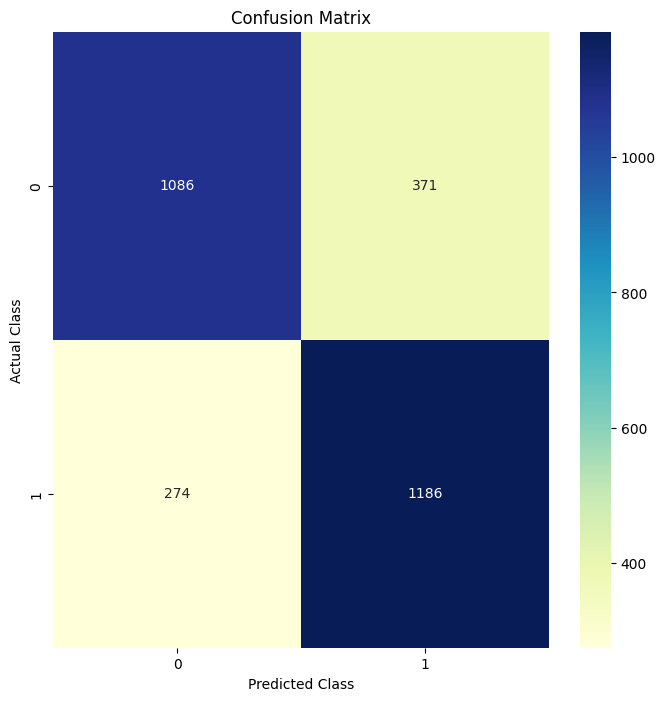

In [36]:
cm = confusion_mat

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

In [37]:
# ROC score to measure the model's ability to distinguish between positive and negative classes
from sklearn.metrics import roc_auc_score, auc
auc = roc_auc_score(y_test_lr, y_pred_lr)
auc

# Higher ROC value will indicate better performance

0.7788479799926665

### Random Forest

In [38]:
# Oversampling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=1/3, random_state=42, stratify=y_resampled)


0    4861
1     249
Name: count, dtype: int64

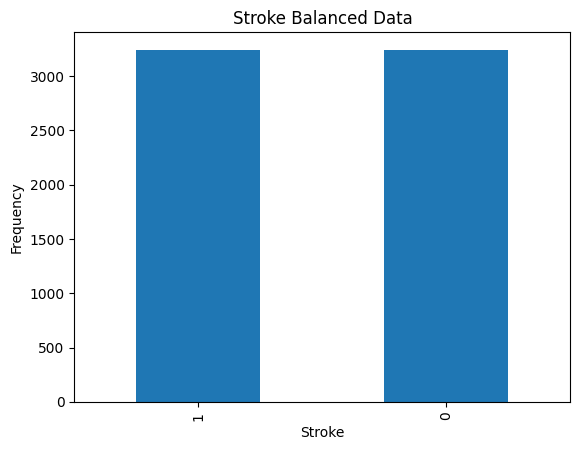

In [39]:
# Check if data is balanced
pd.value_counts(y_train).plot.bar()
plt.title('Stroke Balanced Data')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
pd.value_counts(y)

In [40]:
# Standardising data values
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
print(X_train_std.shape)
print(X_test.shape)

(6481, 21)
(3241, 21)


In [41]:
# Normalising data values
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
print(X_train_norm.shape)
print(X_test.shape)

(6481, 21)
(3241, 21)


In [42]:
# Importing necessary algorithm libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble, metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [43]:
# Import lib
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble, metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [43]:
print('Random Forest')

rf = RandomForestClassifier(criterion='gini', max_depth=5, random_state=42)
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Acc=accuracy_score(y_test, y_pred) * 100
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print("Training-Score",rf.score(X_train_std,y_train))
print("Testing -Score",rf.score(X_test_std,y_test))

Random Forest
Confusion Matrix:
[[1135  486]
 [ 184 1436]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1621
           1       0.75      0.89      0.81      1620

    accuracy                           0.79      3241
   macro avg       0.80      0.79      0.79      3241
weighted avg       0.80      0.79      0.79      3241

Accuracy : 79.32736809626658
Training-Score 0.7909273260299337
Testing -Score 0.7932736809626658


In [44]:
roc = roc_auc_score(y_test,y_pred)
print('ROC AUC Score: {:.2f} %'.format(roc))

# k-fold validation; k = 10 folds
accuracies = cross_val_score(estimator= rf, X = X_train_std,y = y_train, cv=10)
print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))

ROC AUC Score: 0.79 %
K-Fold Validation Mean Accuracy: 79.37 %


Text(0.5, 23.52222222222222, 'Predicted label')

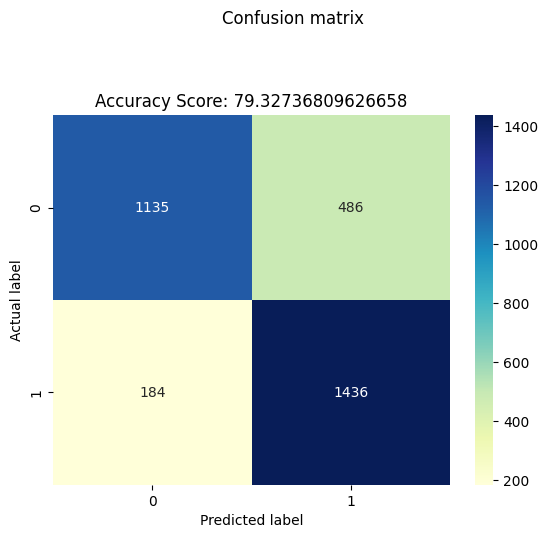

In [45]:
y_pred = rf.predict(X_test_std)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = rf.predict(X_test_std)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.suptitle('Confusion matrix', y=1.1)
plt.title('Accuracy Score: {0}'.format(Acc))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
# random forest does not directly provide a loss curve since it does not optimize a loss function
# an accuracy/ learning curve is plotted instead using the use the out-of-bag (OOB) error estimate
n_estimators_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
oob_errors = []

for n_estimators in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n_estimators, oob_score=True, random_state=42)
    clf.fit(X_train_std, y_train)
    oob_error = 1 - clf.oob_score_
    oob_errors.append(oob_error)

c:\Users\Aireen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\Aireen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


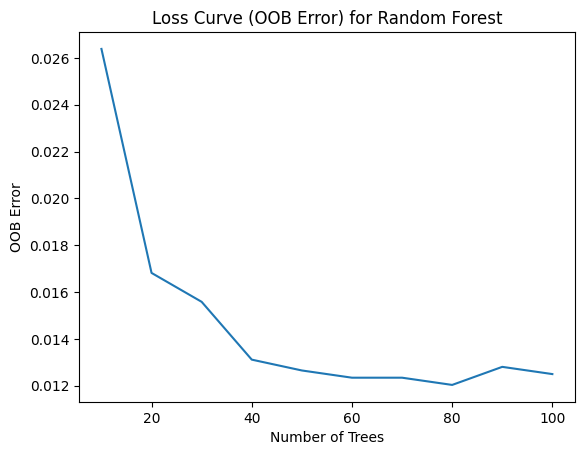

In [47]:
# plotting the loss curve
plt.plot(n_estimators_range, oob_errors)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('Loss Curve (OOB Error) for Random Forest')
plt.show()

The OOB curve does not have a 'best fit' curve. The OOB error curve typically shows the relationship between the number of trees in the random forest and the corresponding OOB error. As the number of trees increases, the OOB error tends to decrease, indicating improved accuracy. 

### KNN (K-Nearest Neighbours)

In [48]:
#KNN
print('KNN')
test_scores = []
train_scores = []

for i in range(1, 11):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_std, y_train)
    
    train_scores.append(knn.score(X_train_std, y_train))
    y_pred = knn.predict(X_test_std)
    test_scores.append(accuracy_score(y_test, y_pred))

average_accuracy = np.mean(test_scores)
print("Average Accuracy: {:.2f}%".format(average_accuracy * 100))
    
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100, list(map(lambda x: x+1, train_scores_ind))))

max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100, list(map(lambda x: x+1, test_scores_ind))))

KNN
Average Accuracy: 91.99%
Max train score 100.0 % and k = [1, 2]
Max test score 96.57513113236655 % and k = [1, 2]


Model results analysis
- Create visual graph to evaluate train and test scores using "matplotlib"
- Analyse whether trained data is overfitting or underfitting the dataset based on the train score and test score lines
- The results shows no overfitting or underfitting and suggest that the model fits the testing data

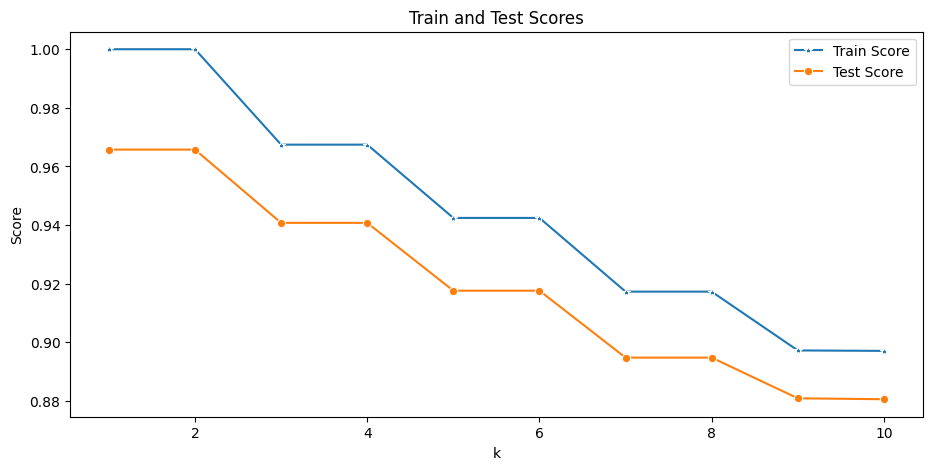

In [49]:
plt.figure(figsize=(11, 5))
sns.lineplot(x=range(1, 11), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 11), y=test_scores, marker='o', label='Test Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Train and Test Scores')
plt.legend()
plt.show()


Obtain the accuracy of the trained model with the latest K value

In [50]:
knn = KNeighborsClassifier(11)

knn.fit(X_train_std,y_train)
knn.score(X_test_std,y_test)

0.8660907127429806

Confusion Matrix graph classification results representation

Text(0.5, 23.52222222222222, 'Predicted label')

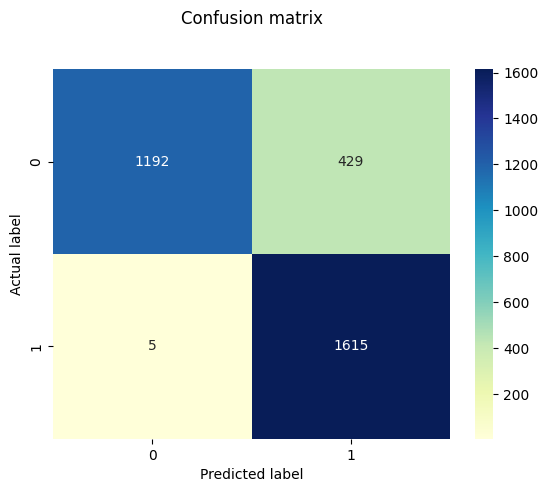

In [51]:
y_pred = knn.predict(X_test_std)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = knn.predict(X_test_std)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1621
           1       0.79      1.00      0.88      1620

    accuracy                           0.87      3241
   macro avg       0.89      0.87      0.86      3241
weighted avg       0.89      0.87      0.86      3241



### Neural Network

In [53]:
# Importing model development tools
from tensorflow import keras
from keras import layers, callbacks

# Setup plotting tools
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Defining reusable codes
def plot_learning_curve(history):
    history = pd.DataFrame(history.history)
    history.loc[0:, ['loss', 'val_loss']].plot()
    history.loc[0:, ['accuracy', 'val_accuracy']].plot(ylim=(0,1))
    print("Minimum validation loss: {:0.4f}".format(history['val_loss'].min()))

C:\Users\Aireen\AppData\Local\Temp\ipykernel_6348\14256057.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Rescaling the feature values and partitionining training data partly for validation set.

- Two datasets are prepared from this: (1) a normalized dataset and (2) a standardized dataset

In [54]:
# Normalized dataset
# did not use this part 
normalizer = MinMaxScaler()
X_tr = normalizer.fit_transform(X_train_std)
X_te = normalizer.transform(X_test_std)
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_tr, y_train, test_size=0.25, random_state=42, shuffle=True)

In [55]:
# Standardized dataset
standardizer = StandardScaler()
X_tr = standardizer.fit_transform(X_train)
X_te = standardizer.transform(X_test)
X_train_nn, X_valid_nn, y_train_nn, y_valid_nn = train_test_split(X_tr, y_train, test_size=0.25, random_state=42, shuffle=True)

developing the model

Epoch 1/200
76/76 [==============================] - 6s 22ms/step - loss: 0.6765 - accuracy: 0.5949 - val_loss: 0.6471 - val_accuracy: 0.6885
Epoch 2/200
76/76 [==============================] - 1s 12ms/step - loss: 0.6518 - accuracy: 0.6833 - val_loss: 0.6291 - val_accuracy: 0.7236
Epoch 3/200
76/76 [==============================] - 1s 12ms/step - loss: 0.6420 - accuracy: 0.6881 - val_loss: 0.6139 - val_accuracy: 0.7372
Epoch 4/200
76/76 [==============================] - 1s 12ms/step - loss: 0.6294 - accuracy: 0.7002 - val_loss: 0.5988 - val_accuracy: 0.7489
Epoch 5/200
76/76 [==============================] - 1s 12ms/step - loss: 0.6201 - accuracy: 0.7123 - val_loss: 0.5768 - val_accuracy: 0.7606
Epoch 6/200
76/76 [==============================] - 1s 10ms/step - loss: 0.6097 - accuracy: 0.7200 - val_loss: 0.5677 - val_accuracy: 0.7631
Epoch 7/200
76/76 [==============================] - 1s 9ms/step - loss: 0.5980 - accuracy: 0.7321 - val_loss: 0.5685 - val_accuracy: 0.7699
Epoch 8

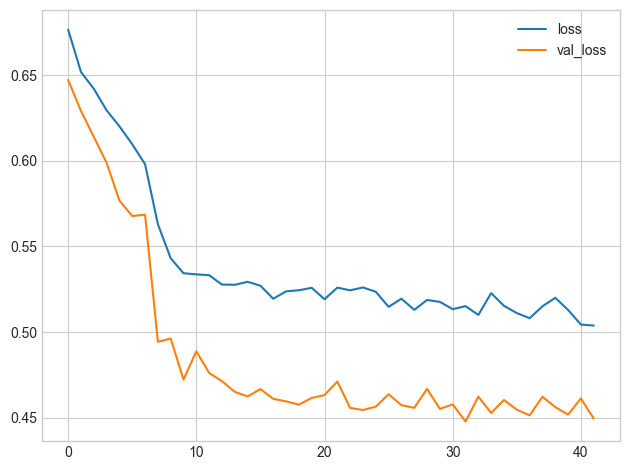

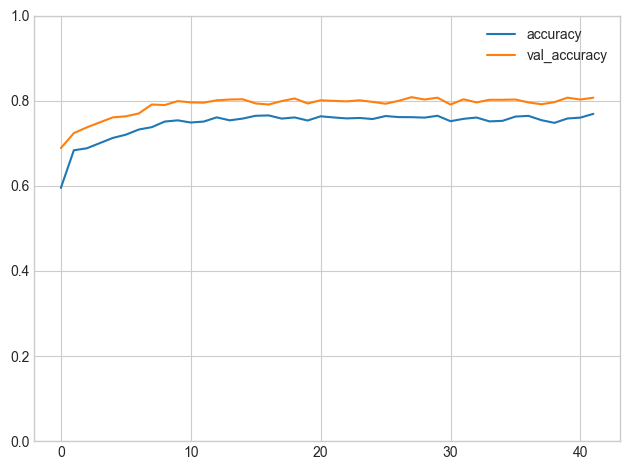

In [56]:
feature_dim = X_train_nn.shape[1]

early_stop = callbacks.EarlyStopping(
                min_delta=0.001, # amount of change in loss to execute early stopping
                patience=10, # number of epochs to wait for before early stopping
                restore_best_weights=True, # change the best weights before overfitting occurs
)

neural_network = keras.Sequential([
                    layers.Dense(2, activation='sigmoid', input_shape=[feature_dim]),
                    layers.Dense(1024, activation='relu'),
                    layers.Dense(256, activation='relu'),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(4, activation='relu'),
                    layers.Dropout(rate=0.3),
                    layers.Dense(1, activation='sigmoid'),
])

neural_network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_nn = neural_network.fit(
                    x=X_train_nn, y=y_train_nn,
                    validation_data=(X_valid_nn, y_valid_nn),
                    batch_size=64,
                    epochs=200,
                    verbose=1,
                    callbacks=[early_stop],

)

plot_learning_curve(history_nn)

102/102 [==============================] - 0s 2ms/step


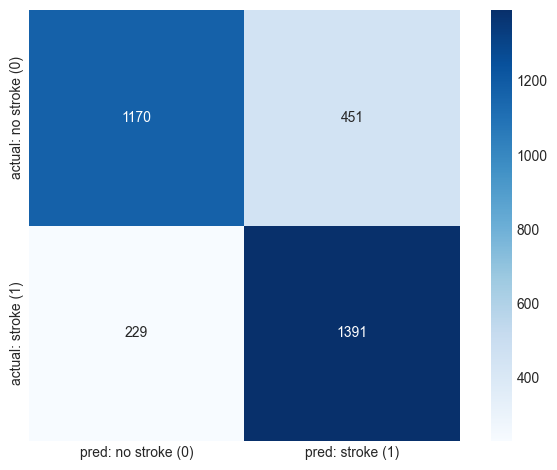

              precision    recall  f1-score   support

           0       0.84      0.72      0.77      1621
           1       0.76      0.86      0.80      1620

    accuracy                           0.79      3241
   macro avg       0.80      0.79      0.79      3241
weighted avg       0.80      0.79      0.79      3241

Train Accuracy: 	0.789
Validation Accuracy: 	0.803
Test Accuracy: 		0.790


In [57]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = np.round(neural_network.predict(X_te))

xlabels = ['pred: no stroke (0)', 'pred: stroke (1)']
ylabels = ['actual: no stroke (0)', 'actual: stroke (1)']
material = confusion_matrix(y_test, y_pred) 
sns.heatmap(material, square=True, annot=True, fmt='d', cbar=True, cmap='Blues', xticklabels=xlabels, yticklabels=ylabels)
plt.show()

# Displaying classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Display train, validation and test accuracies
loss, train_acc = neural_network.evaluate(X_train_nn, y_train_nn, verbose=0)
print('Train Accuracy: \t%.3f' % train_acc)

loss, valid_acc = neural_network.evaluate(X_valid_nn, y_valid_nn, verbose=0)
print('Validation Accuracy: \t%.3f' % valid_acc)

loss, test_acc = neural_network.evaluate(X_te, y_test, verbose=0)
print('Test Accuracy: \t\t%.3f' % test_acc)

### Decision Tree

In [58]:
#Import necessary libraries
from sklearn import tree #Provides the decision tree classifier.
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import learning_curve
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #for evaluating the model's performance

Before cross-validation

In [59]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_std, y_train)

print_score(tree_clf, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(tree_clf, X_train_std, y_train, X_test_std, y_test, train=False)

NameError: name 'print_score' is not defined

Decision Tree Classifier Hyperparameter tuning

- max_depth: determines the maximum depth or the maximum number of levels in the decision tree
- min_samples_split : specifies the minimum number of samples required to split an internal node during the construction of the decision tree
- min_samples_leaf: sets the minimum number of samples required to be at a leaf node.

In [ ]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train_std, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_std, y_train)
print_score(tree_clf, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(tree_clf, X_train_std, y_train, X_test_std, y_test, train=False)

so the result after done some tuning is :

best hyperparameter:

- criterion': 'gini'
- max_depth: 18
- min_samples_leaf: 1
- min_samples_split: 2
- splitter: best

Training result: Accuracy Score: 99.60%

Testing result: Accuracy Score: 96.88%

After cross-validation

In [ ]:
# Evaluate the model on testing data
y_pred_test = tree_clf.predict(X_test_std)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)*100
confusion = confusion_matrix(y_test, y_pred_test)
classification = classification_report(y_test, y_pred_test)

# Print evaluation metrics
print("Testing Results:")
print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification)

In [ ]:
kcm = confusion_matrix(y_test,y_pred_test)

plt.figure(figsize=(9,9))
sns.heatmap(kcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

Final result model analysis:

- Create visual graph to evaluate train and test scores using "matplotlib"
- Analyse whether trained data is overfitting or underfitting the dataset based on the train score and test score lines
- The results shows no overfitting or underfitting and suggest that the model fits the testing data

In [ ]:
# Create a new decision tree classifier with the best parameters
best_tree_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=18,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best'
)

# Calculate the learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    best_tree_clf, X_train_std, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

# Calculate the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, test_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Model Comparison

Now that we have tested our data in multiple training model, we are going to compare the accuracy score for each and find out which model got the best resutls. 

In [72]:
mscore=[] # declare an array mscore, to store all the accuracy scores in all models
mscore.append(['Logistic Regression', lr.score(X_test, y_test)])
mscore.append(['Random Forest', rf.score(X_test, y_test)])
mscore.append(['KNN', knn.score(X_test, y_test)])
#mscore.append(['ANN', neural_network.evaluate(X_test, y_test)])

In [73]:
#arrange the values in descending order and print array
mscore.sort(key=lambda x: x[1], reverse=True)
mscore

[['KNN', 0.5013884603517433],
 ['Logistic Regression', 0.4998457266275841],
 ['Random Forest', 0.4998457266275841]]

Accracy Score: 

KNN: 50.14%
Logistic Regression: 49.98%
Random Forest: 49.98%


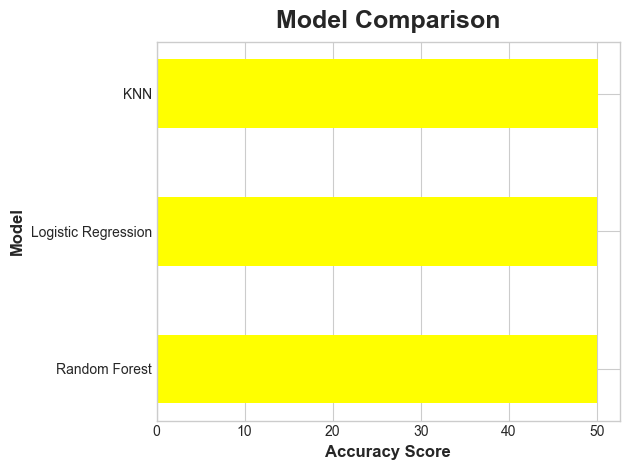

In [74]:
#display the values in a horizontol bar chart 
model = list(i[0] for i in mscore)
score = list(round(i[1]*100,2) for i in mscore)

print('Accracy Score: \n')
for m,s in zip(model, score):
    print(f'{m}: {s}%')

#creating horizontal bar chart
plt.barh(model, score, height = 0.5, color='yellow') 

plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()